In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Load Train, Test and Macro data

In [3]:
path = "Dataset/" # path to Google Drive, for colab
macro = os.path.join(path, "macro.csv")
train = os.path.join(path, "train.csv")
test = os.path.join(path,  "test.csv")

# place all datasets paths in a datasets dict
datasets = {}
datasets['macro'] = macro
datasets['train'] = train
datasets['test'] = test


# load dataframes into dfs dict
dfs = {}
for dataset_name, path in datasets.items():
    df = pd.read_csv(path)
    dfs[dataset_name] = df

# assign to own df variables when you want to use them individually
df_macro = dfs['macro']
df_train = dfs['train']
df_test = dfs['test']

## Missing Data & Data Quality

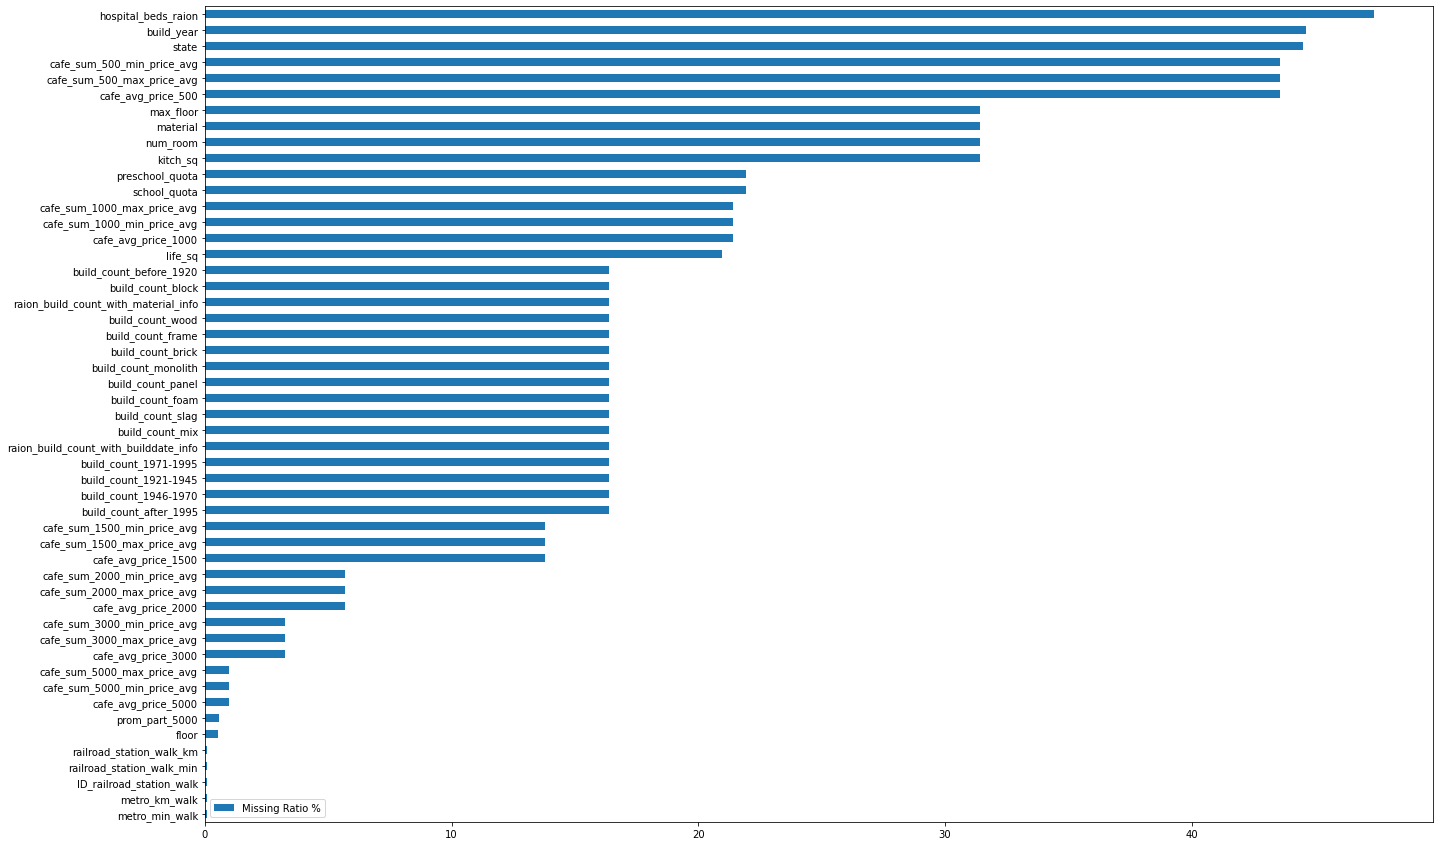

In [4]:
plt.rcParams['figure.figsize'] = (22, 15)
na_df = (df_train.isnull().sum() / len(df_train)) * 100      
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=True)
missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
missing_data.plot(kind = "barh")
plt.show()

Of 292 columnns, 51 columns have missing values. Missing % varies from 0.08% to 47.4% as shown above.

In [36]:
# Checking if all columns in train dataset are present in test dataset
print("Present in train but missing in test:", set(df_train.columns).difference(set(df_test.columns)))
print("Present in test but missing in train:", set(df_test.columns).difference(set(df_train.columns)))

Present in train but missing in test: {'price_doc'}
Present in train but missing in test: set()


In [31]:
print(list(df_train.columns))

['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_ma

In [27]:
# Getting unique values and counts for each column in train data
for c in df_train.columns:
    print("---- %s ---" % c)
    print(df_train[c].value_counts())

---- id ---
2049     1
19100    1
27320    1
4791     1
6838     1
        ..
23873    1
21824    1
11567    1
9518     1
2047     1
Name: id, Length: 30471, dtype: int64
---- timestamp ---
2014-12-16    160
2014-12-09    147
2014-06-30    133
2014-12-18    118
2014-11-25     93
             ... 
2015-04-05      1
2011-08-20      1
2013-03-24      1
2014-05-25      1
2011-09-09      1
Name: timestamp, Length: 1161, dtype: int64
---- full_sq ---
38     1928
37     1232
39     1013
44     1008
45      943
       ... 
182       1
6         1
325       1
173       1
303       1
Name: full_sq, Length: 211, dtype: int64
---- life_sq ---
19.0     2138
30.0     1565
18.0     1544
20.0     1208
28.0     1067
         ... 
174.0       1
172.0       1
426.0       1
179.0       1
136.0       1
Name: life_sq, Length: 175, dtype: int64
---- floor ---
3.0     3028
2.0     2874
5.0     2752
4.0     2609
1.0     2002
7.0     1966
6.0     1878
9.0     1843
8.0     1830
12.0    1341
10.0    1307
11.0    

3.194229     976
12.180740    603
18.018980    582
8.800419     364
19.524310    319
            ... 
10.650380      1
7.342414       1
10.935610      1
27.369640      1
21.411910      1
Name: incineration_km, Length: 11829, dtype: int64
---- railroad_station_walk_km ---
1.923495     976
3.378717     603
7.713678     582
10.745473    364
4.090548     319
            ... 
1.719437       1
0.526559       1
2.845050       1
1.679163       1
1.454396       1
Name: railroad_station_walk_km, Length: 11834, dtype: int64
---- railroad_station_walk_min ---
23.081939     976
40.544603     603
92.564133     582
128.945675    364
49.086573     319
             ... 
61.638502       1
63.823916       1
7.084839        1
33.186535       1
11.626146       1
Name: railroad_station_walk_min, Length: 11834, dtype: int64
---- ID_railroad_station_walk ---
24.0     2604
47.0     2148
75.0     1611
42.0     1310
39.0     1272
         ... 
127.0       1
129.0       1
131.0       1
130.0       1
133.0       1

0      11304
1       5386
2       2995
3       2041
4       1644
       ...  
132        1
148        1
118        1
86         1
143        1
Name: office_count_1500, Length: 154, dtype: int64
---- office_sqm_1500 ---
0          11342
117300       701
1259653      603
6000         543
11000        443
           ...  
1192545        1
1030640        1
186860         1
342480         1
583667         1
Name: office_sqm_1500, Length: 2639, dtype: int64
---- trc_count_1500 ---
0     7765
1     4125
3     3287
2     2871
4     2768
5     2371
6     1803
7     1288
8     1100
9      812
10     685
25     605
11     306
12     229
13     206
14      69
16      65
19      25
15      24
20      19
17      16
18      14
24       4
23       4
27       4
22       4
21       2
Name: trc_count_1500, dtype: int64
---- trc_sqm_1500 ---
0          7972
17000      1027
117300      701
1075476     603
1700        453
           ... 
580832        1
136441        1
111901        1
443788        1
61606 

In [22]:
# Checks for certain features
print("Number of rows where home floor is larger than max_floor:", len(df_train[df_train['floor'] > df_train['max_floor']]))
print("Number of rows where life_sq is larger than full_sq:", len(df_train[df_train['life_sq'] > df_train['full_sq']]))

Number of rows where home floor is larger than max_floor: 1493
Number of rows where life_sq is larger than full_sq: 37


1. We notice that all columns in train data are also present in test data, except `price_doc` which is the prediction variable. 
  
2. The column `state` should have discrete values between 1 and 4. There is one row having 33, which is just a typo and was probably meant to be 3. Hence, we fix that by replacing with 3.  
  
3. `build_year` has few erroneous values including: 20052009, 0, 1, 3, 20, 70, 215. It is unclear what each of these are truly supposed to be.  
  1. We replace 20052009 with 2007 (mentioned in Kaggle discussions).
  2. Remaining values are replaced with median of data. We choose not to drop these rows as they are a large proportion of training data.  
  
4. There are ~1500 rows where `floor` is larger than `max_floor`, which is again, a data entry error


## Training Data features

#### We first manually select some internal features of a home to explore further

<AxesSubplot:>

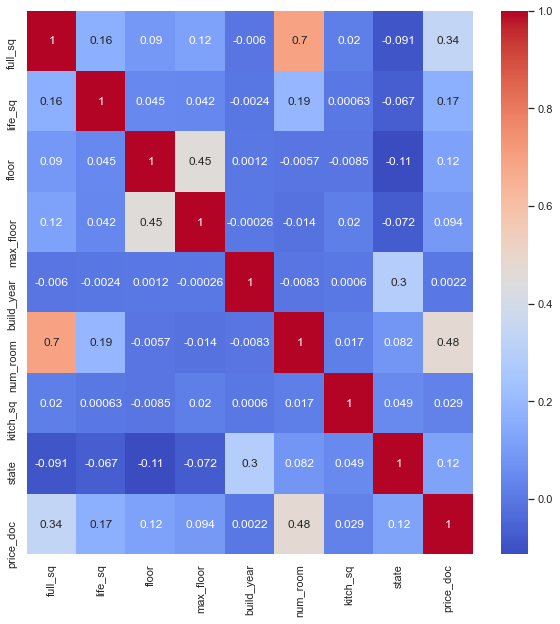

In [27]:
# Plotting correlation matrix amongst all internal features
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', \
                    'kitch_sq', 'state', 'price_doc']
plt.figure(figsize=(10,10))
sb.set(font_scale=1)
sb.heatmap(df_train[internal_chars].corr(), annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

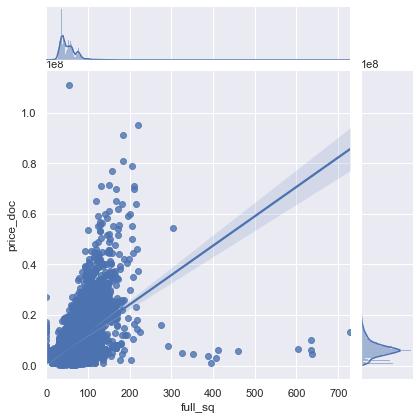

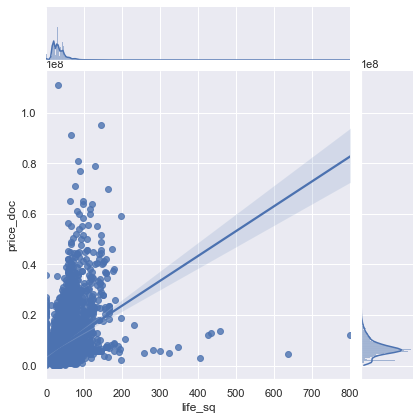

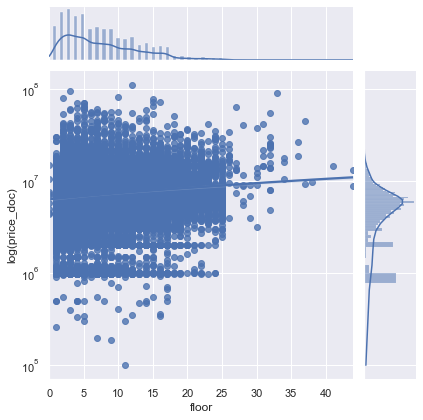

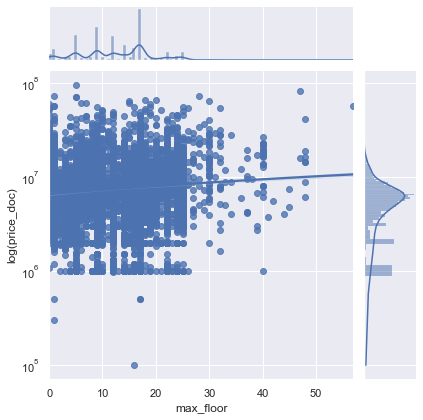

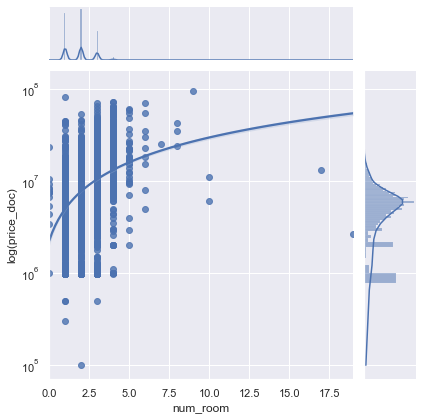

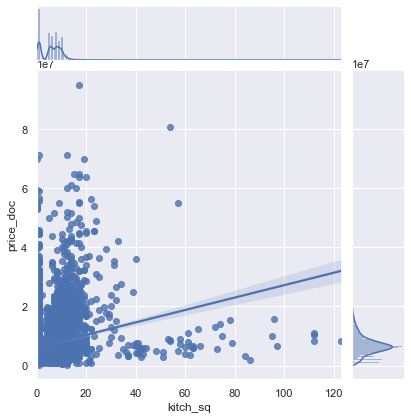

In [28]:
# Jointplots for internal characteristics against price_doc
g = sb.jointplot(data=df_train[df_train['full_sq'] < 2000], x="full_sq", y="price_doc", kind="reg")

g = sb.jointplot(data=df_train[df_train['life_sq'] < 2000], x="life_sq", y="price_doc", kind="reg")

g = sb.jointplot(data=df_train[df_train['floor'] < 50], x="floor", y="price_doc", kind="reg")
g.ax_joint.set_yscale('log'); g.ax_joint.set_ylabel('log(price_doc)')

g = sb.jointplot(data=df_train[df_train['max_floor'] < 60], x="max_floor", y="price_doc", kind="reg")
g.ax_joint.set_yscale('log'); g.ax_joint.set_ylabel('log(price_doc)')

g = sb.jointplot(data=df_train, x="num_room", y="price_doc", kind="reg")
g.ax_joint.set_yscale('log'); g.ax_joint.set_ylabel('log(price_doc)')

g = sb.jointplot(data=df_train[df_train['kitch_sq'] < 500], x="kitch_sq", y="price_doc", kind="reg")

Most of the above features show some correlation with `price_doc`. `life_sq`, `full_sq` and `num_room` are important features, and can also be used to generate new features.

Text(0, 0.5, 'log(price_doc)')

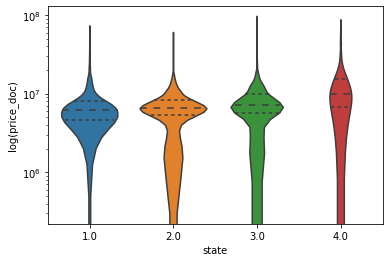

In [20]:
# Home price vs. State (condition of apartment)
g = sb.violinplot(data=df_train[df_train["state"]!=33], x="state", y="price_doc", inner='quartile')
g.set_yscale('log'); g.set_ylabel('log(price_doc)')

Hard to tell but there seems to be slight increase in median (and quartile) prices of homes as state is higher

Text(0, 0.5, 'log(price_doc)')

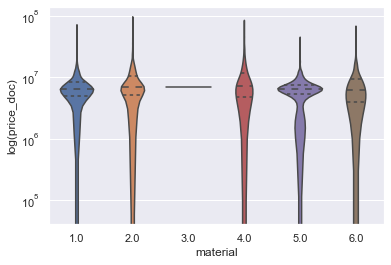

In [48]:
# Home price vs. Material used
g = sb.violinplot(data=df_train[df_train["state"]!=33], x="material", y="price_doc", inner='quartile')
g.set_yscale('log'); g.set_ylabel('log(price_doc)')

Material 3 has only 1 entry, and Material 1 has most number of homes. Again, it is unclear what these values mean since this feature has not been described in the data dictionary.  
  
>according to admin:  
1 - panel, 2 - brick, 3 - wood, 4 - mass concrete, 5 - breezeblock, 6 - mass concrete plus brick.  
[Source](https://www.kaggle.com/competitions/sberbank-russian-housing-market/discussion/33891#187561)

#### Next, we move on to demographic & geographical features which includes neighbourhood facilities

<AxesSubplot:>

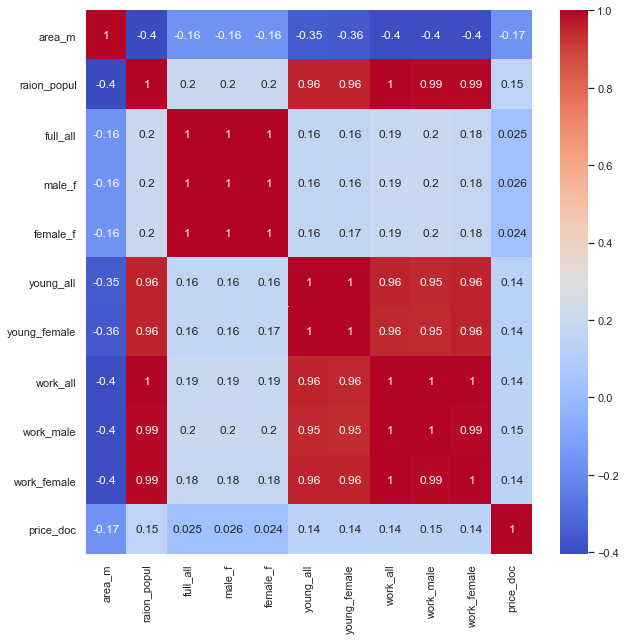

In [26]:
# Correalation matrix for demographic features
demo_chars = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', \
               'young_female', 'work_all', 'work_male', 'work_female', 'price_doc']
plt.figure(figsize=(10,10))
sb.set(font_scale=1)
sb.heatmap(df_train[demo_chars].corr(), annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

There seems to be very weak correlation between `price_doc` and above demographic features

Exploring `sub_area` (name of district)  
  
In Moscow, the city is divided into "okrugs" that are further divided into "raions". The `sub_area` is the name of the raion.  
Another interesting feature to explore would be the population density of each raion and its effect on home price

In [83]:
df_train_temp = df_train[['sub_area', 'area_m', 'raion_popul', 'price_doc']]
df_train_temp['density'] = df_train_temp.apply(lambda x: x['raion_popul']/(x['area_m']/1_000_000), axis=1)
df_train_temp = df_train_temp.groupby('sub_area').median()

<ipython-input-83-0860f3a45002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_temp['density'] = df_train_temp.apply(lambda x: x['raion_popul']/(x['area_m']/1_000_000), axis=1)


Text(25.125, 0.5, 'median price_doc')

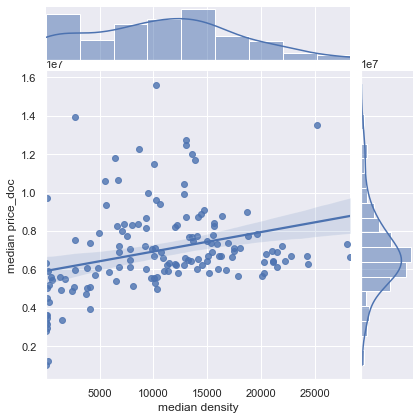

In [46]:
# Median home price vs. raion populatyion density
g = sb.jointplot(data=df_train_temp, x="density", y="price_doc", kind="reg")
g.ax_joint.set_xlabel('median density (/sq km)'); g.ax_joint.set_ylabel('median price_doc')

There seems to be an increase in `price_doc` as raion population density increases. 

<AxesSubplot:xlabel='sub_area'>

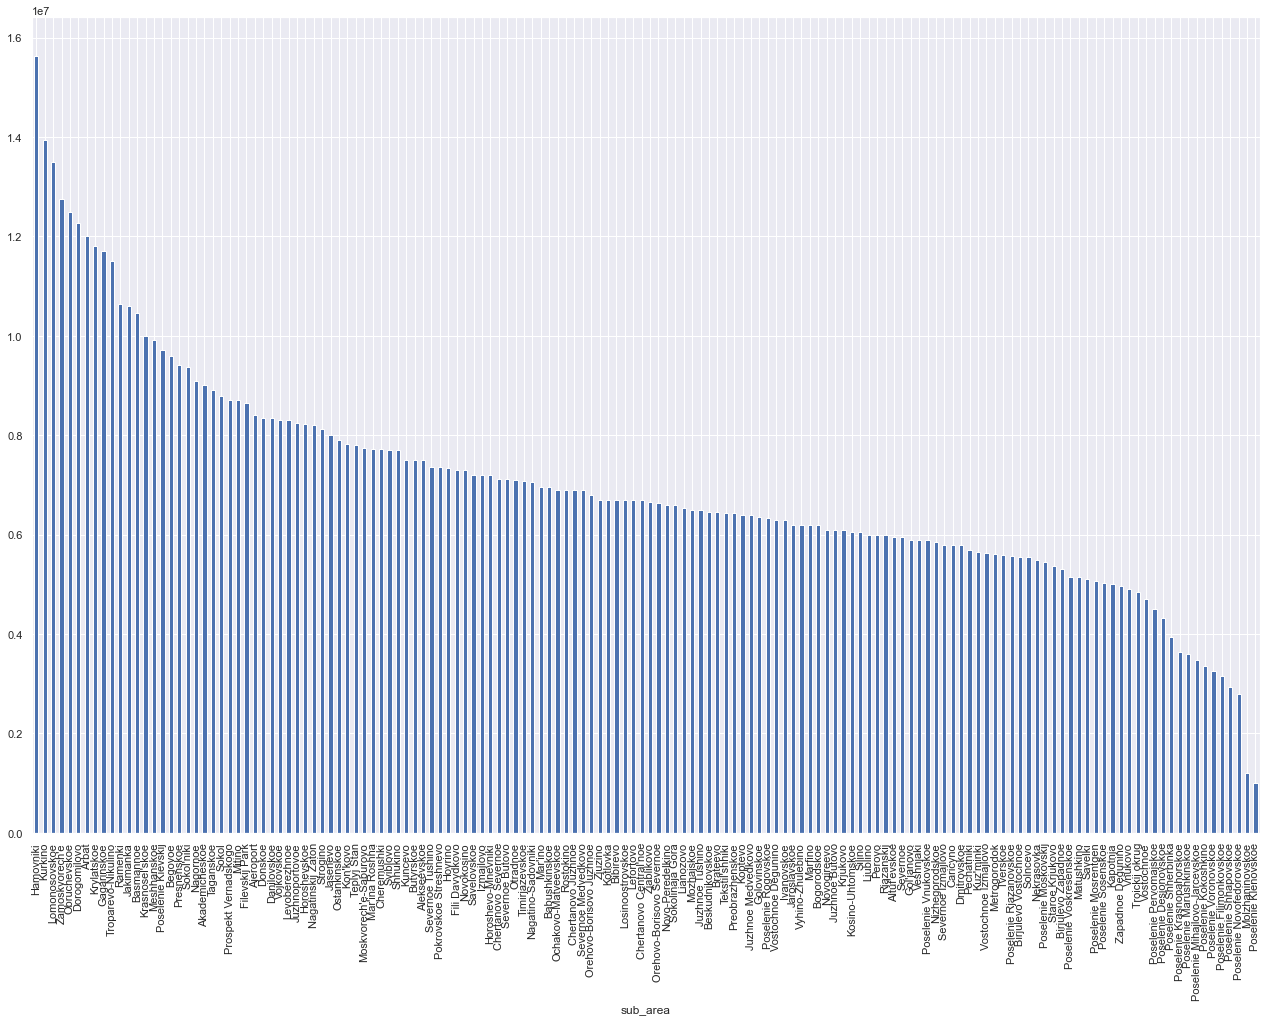

In [84]:
df_train_temp.unstack(0).price_doc.sort_values(ascending=False).plot.bar(figsize=(22,15))

Median of home prices do vary by district and hence, `sub_area` is also a useful feature

####  Educational Characteristics

<AxesSubplot:>

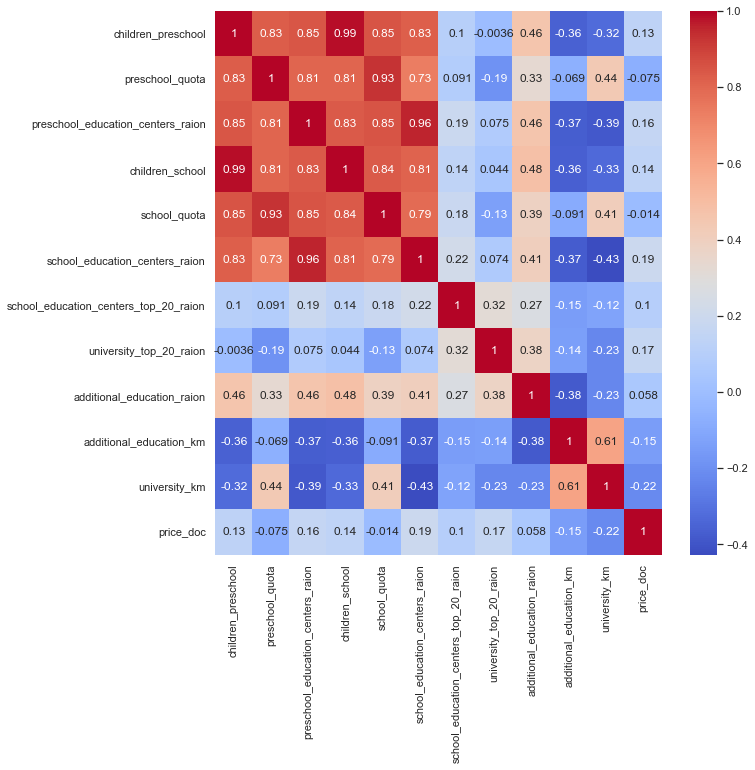

In [96]:
# Correalation matrix for education-based features
edu_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', \
                'school_education_centers_raion', 'school_education_centers_top_20_raion', 'university_top_20_raion', \
                'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
plt.figure(figsize=(10,10))
sb.set(font_scale=1)
sb.heatmap(df_train[edu_chars].corr(), annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

There is very weak correlation between most school features and `price_doc`.  

There are 2 features which may be of interest: `school_education_centers_raion` and `university_km`

Text(0, 0.5, 'log(price_doc)')

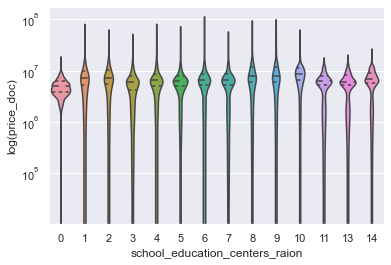

In [91]:
# Home price vs. State (condition of apartment)
g = sb.violinplot(data=df_train, x="school_education_centers_raion", y="price_doc", inner='quartile')
g.set_yscale('log'); g.set_ylabel('log(price_doc)')

The variation in `price_doc` is not very clear. However, homes with 0 high schools in neighbourhood seem to have a definite lower median price

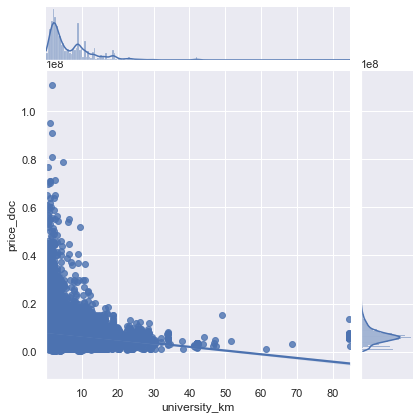

In [92]:
# Home price vs. distance to university
g = sb.jointplot(data=df_train, x="university_km", y="price_doc", kind="reg")

In this case, `price_doc` shows a decreasing trend as distance to university increases. This also makes logical sense and can hence be used a feature

#### Cultural / Recreational Characteristics

<AxesSubplot:>

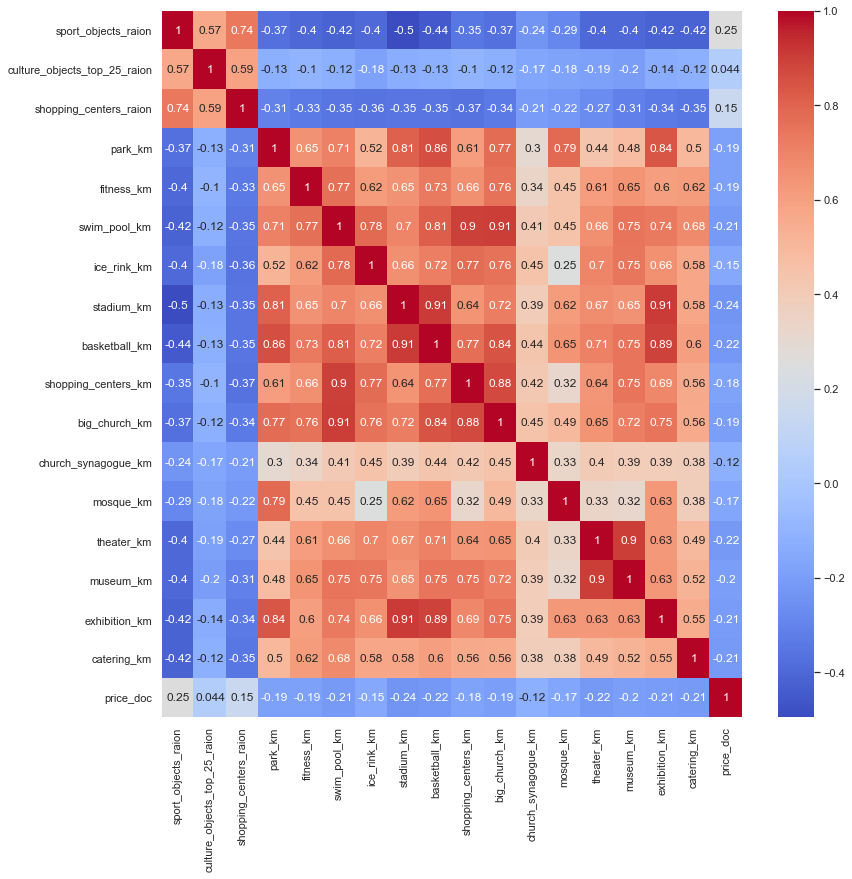

In [98]:
# Correalation matrix for cultural and recrational features
cultural_chars = ['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'park_km', 'fitness_km',\
                  'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km', 'shopping_centers_km', 'big_church_km',\
                  'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'price_doc']
plt.figure(figsize=(13,13))
sb.set(font_scale=1)
sb.heatmap(df_train[cultural_chars].corr(), annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

We will further explore following features which show some correlation with `price_doc`: `sport_objects_raion`, `park_km`, `fitness_km`, `swim_pool_km`, `stadium_km`

In [113]:
# Grouping by sub_area to get median home price and mean sport_objects_raion 
df_train_temp = df_train[['sub_area', 'sport_objects_raion', 'price_doc']]
df_train_temp['mean_sport_objects_raion'] = df_train_temp.groupby('sub_area').sport_objects_raion.transform(lambda x: x.mean())
df_train_temp['median_price_doc'] = df_train_temp.groupby('sub_area').price_doc.transform(lambda x: x.median())

<ipython-input-113-6ff28d6c1b67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_temp['mean_sport_objects_raion'] = df_train_temp.groupby('sub_area').sport_objects_raion.transform(lambda x: x.mean())
<ipython-input-113-6ff28d6c1b67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_temp['median_price_doc'] = df_train_temp.groupby('sub_area').price_doc.transform(lambda x: x.median())


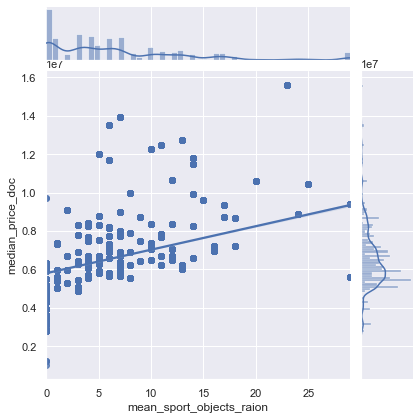

In [114]:
# Median home price vs. mean number of sports equipment in raion
g = sb.jointplot(data=df_train_temp, x="mean_sport_objects_raion", y="median_price_doc", kind="reg")

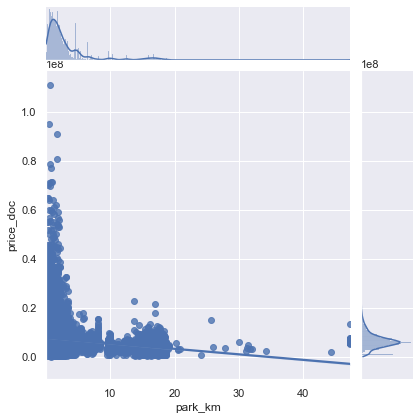

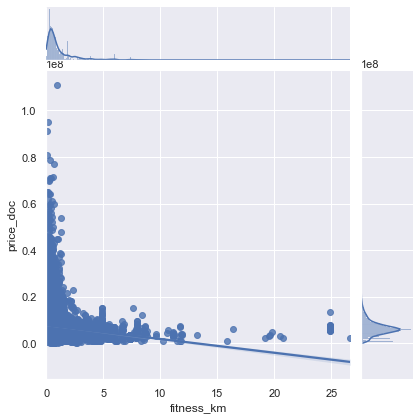

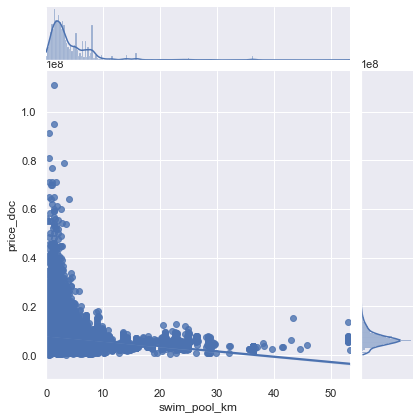

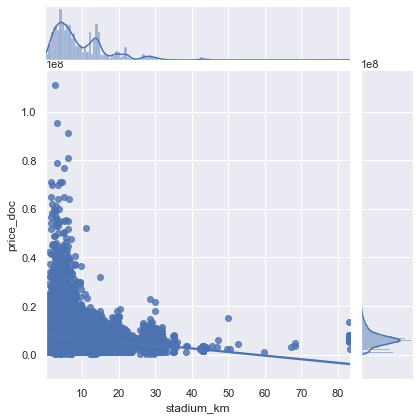

In [115]:
# Home price vs. distance to park, swimming pool, fitness centre, stadium
g = sb.jointplot(data=df_train, x="park_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="fitness_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="swim_pool_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="stadium_km", y="price_doc", kind="reg")

Although all the above features show slight negative correlation, they may not be very strong candidate features alone. Perhaps, an aggregation of above features would be more reliable.

#### Infrastructure & Facilities

<AxesSubplot:>

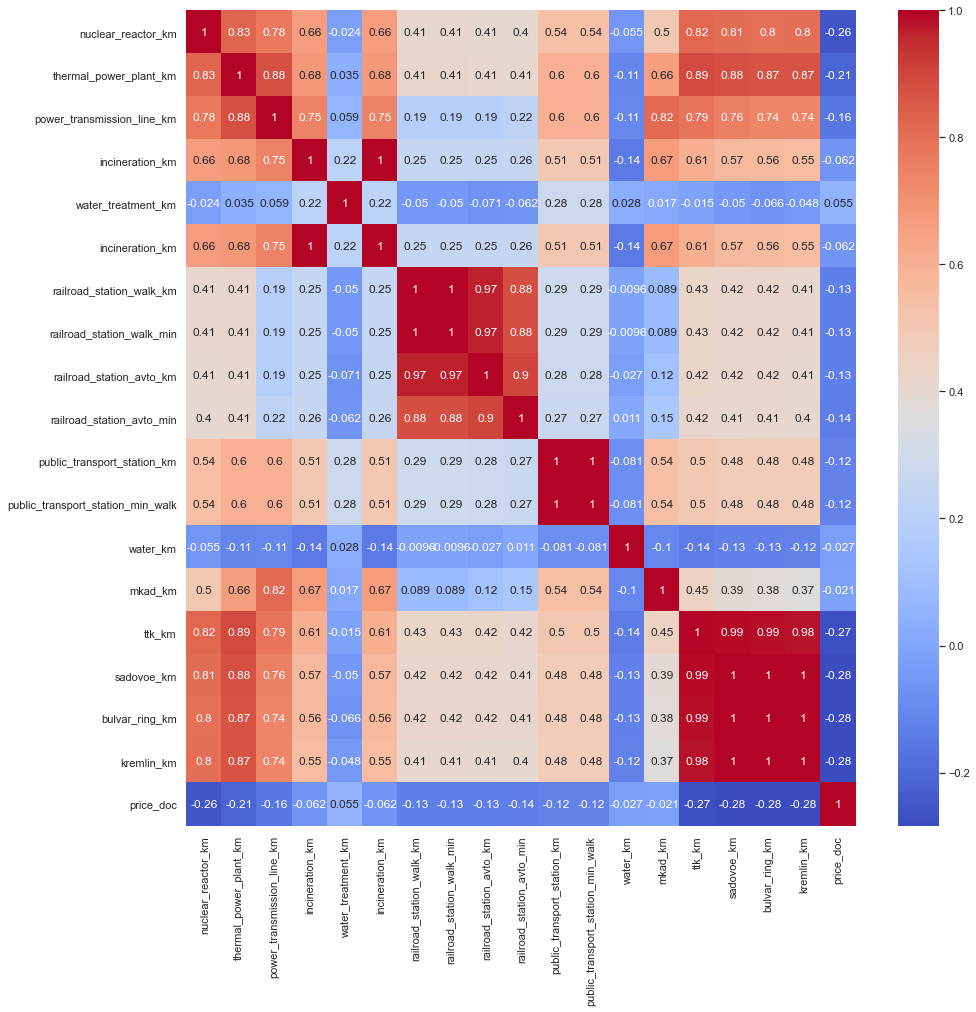

In [118]:
# Correalation matrix for infrastructure features
inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km', \
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', \
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', \
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',\
                'kremlin_km', 'price_doc']
plt.figure(figsize=(15,15))
sb.set(font_scale=1)
sb.heatmap(df_train[inf_features].corr(), annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

It appears `nuclear_reactor_km` has a slight negative correlation which is also logically justifiable. 
  
Additionally, `ttk_km` (distance to Third Transport Ring), `sadovoe_km` (distance to Garden Ring), `bulvar_ring_km` (distance to Boulevard Ring) and `kremlin_km` (distance to City center) are important features.

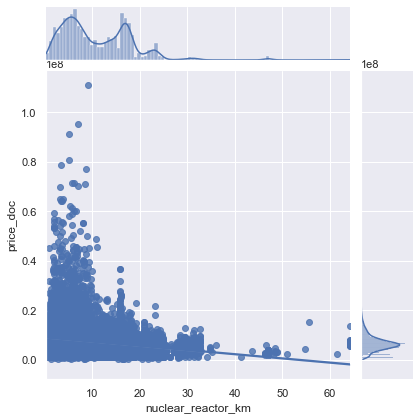

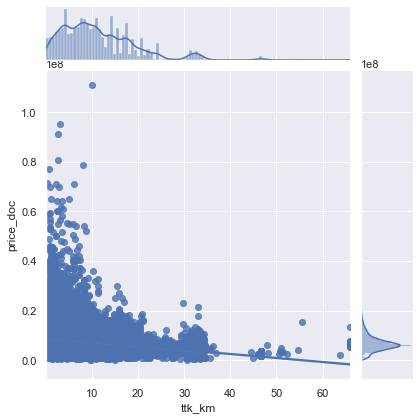

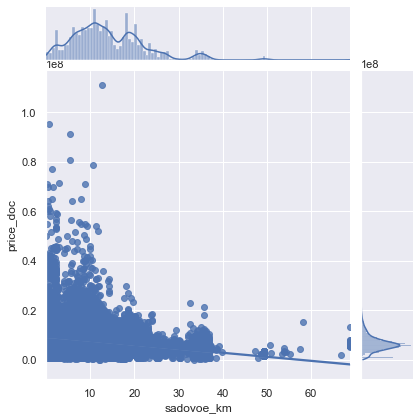

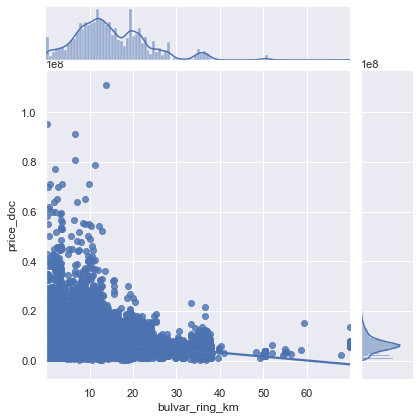

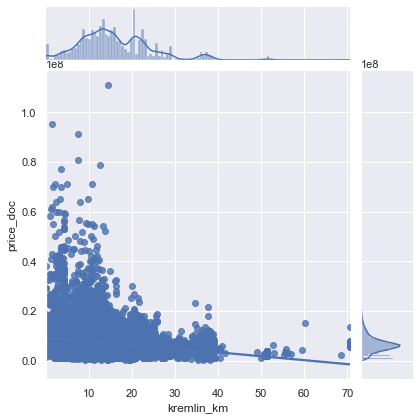

In [120]:
# Drawing correlation plots for each of the above features
g = sb.jointplot(data=df_train, x="nuclear_reactor_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="ttk_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="sadovoe_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="bulvar_ring_km", y="price_doc", kind="reg")
g = sb.jointplot(data=df_train, x="kremlin_km", y="price_doc", kind="reg")

Checking the above info. on a map, we find that Third Transport Ring, Garden Ring, Boulevard Ring, and Kremlin city center are all within 10 km of each other. Additionally, each of these plots are fairly similar which may be accountable to date entry errors. [Google Maps](https://www.google.com/maps/dir/Garden+Ring,+Moskva,+Russia/Fountain+the+Third+Transport+Ring,+Third+Ring+Rd,+Moscow,+Russia,+121165/BOULEVARD+RING+OFFICE+BUILDING,+Moscow,+Russia/Moscow+Kremlin,+Moscow,+Russia/@55.7667362,37.5594933,13z/data=!3m1!4b1!4m26!4m25!1m5!1m1!1s0x46b54bb0fc7960ad:0x459ec80b33870723!2m2!1d37.6558357!2d55.7514326!1m5!1m1!1s0x46b54be89928e839:0x4db6b52be5864760!2m2!1d37.5353089!2d55.7407901!1m5!1m1!1s0x46b54a61cfc2f385:0x95e2983ab5238e3b!2m2!1d37.6454839!2d55.761997!1m5!1m1!1s0x46b54a50b315e573:0xa886bf5a3d9b2e68!2m2!1d37.6174994!2d55.7520233!3e0)  
  
Hence, we will use only a single feature `kremlin_km`.

`nuclear_reactor_km` shows fair negative correlation. This feature is also a strong candidate feature.